In [75]:
using MatrixNetworks
using Distributions
using Gadfly
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using SphericalGraphEmbedding
using Random
using Plots

### LFR toy benchmark

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 173 iterations
  0.398632 seconds (4.67 k allocations: 242.225 MiB, 8.68% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 10
Number of updates: 4
Number of communities: 8
Modularity: 0.4865256970482322
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5176436227712179, 0.2533276657625847, 0.10259232561732468, 0.08898856601597104, 0.0374409301517563]
 -------------------------------------------- 
  2.533446 seconds (2.28 M allocations: 1.584 GiB, 11.99% gc time)
NMI with ground truth: 1.0000000000000002


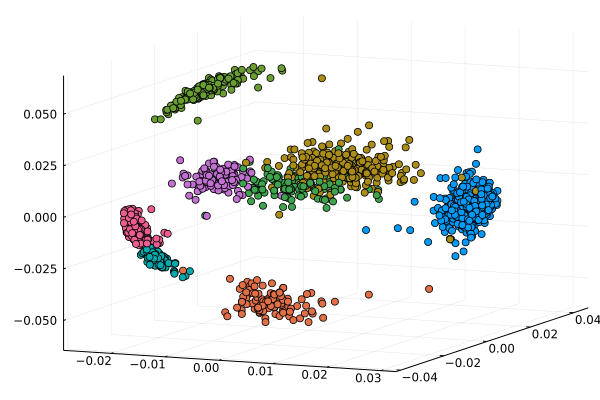

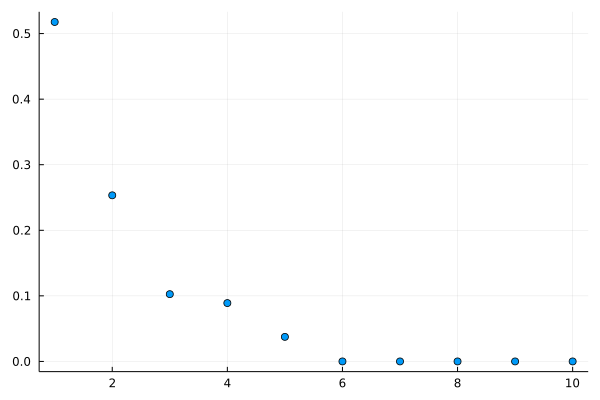

In [147]:
# Loading data

set = "toy_1"#"toy_2"

com_data = readdlm("Data/LFR_data/"*set*"_communities.txt");
adj = readdlm("Data/LFR_data/"*set*"_edgeList.txt");


adj = adj .+ 1 #indices start from 1

# converting to int array
community_true = com_data;
community_true = convert(Array{Int64},community_true);

N = length(community_true);

# construct adjacency matrix
n_edge2 = size(adj)[1];
A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N)
A = A + A'
# largest connected component
A,_ = largest_component(A);
adj = 0; # clear memory


# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
d0 = 10

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 50; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community,sigma =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, d0);

# normalized multual information
nmi = mutualinfo(community_true,community)
println("NMI with ground truth: ", nmi)

# beware run twice to get timings without compilation time

p1 = Plots.plot(x_embed[1,:],x_embed[2,:],x_embed[3,:],seriestype=:scatter, color = community_true, legend = false)
savefig("figures/LFR_"*set*"_embedding.pdf")
display(p1)

p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5)
savefig("figures/LFR_"*set*"_spectrum.pdf")
display(p2)


### Power EU graph

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 633 iterations
  8.756654 seconds (18.53 k allocations: 5.787 GiB, 18.71% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 12
Number of communities: 36
Modularity: 0.9151880013108205
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5422597664229981, 0.34222811607628173, 0.1152957462500144, 0.00011917234852057667, 4.420282355995027e-5]
 -------------------------------------------- 
 32.254054 seconds (5.83 M allocations: 10.705 GiB, 8.43% gc time)


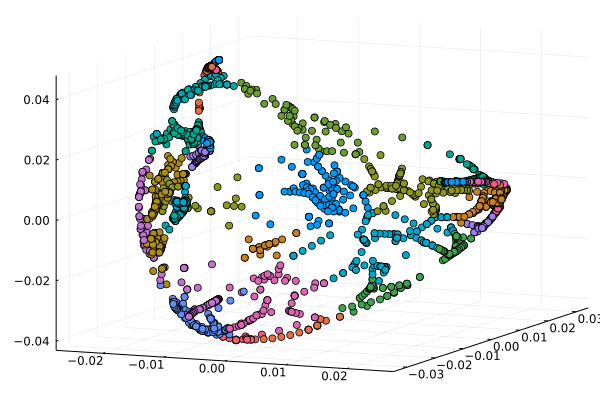

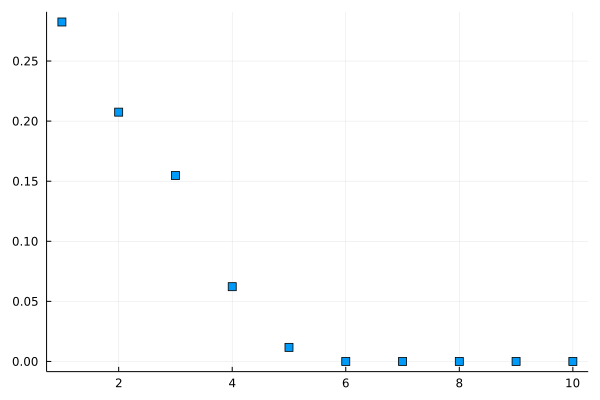

In [125]:
# Loading data
m = readdlm("Data/PowerEU/ElistPowerEU.txt");
dim = size(m,1);

M_int = zeros(Int64,dim,2);
for i =1:dim
	for j=1:2
		M_int[i,j] = Int64(m[i,j]);
	end
end

N = maximum([maximum(M_int[:,1]),maximum(M_int[:,2])]);

A0 =spzeros(N,N);
A0 = sparse(M_int[:,1],M_int[:,2],vec(ones(Int64,dim,1)),N,N);
A0 = A0+A0';
A,p = largest_component(A0);

A0=0;p=0;m =0;

# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
d0 = 50;

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 50;

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community,singular =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, d0)

# beware run twice to get timings without compilation time

p1 = Plots.plot(x_embed[1,:],x_embed[2,:],x_embed[3,:],seriestype=:scatter, color = community, legend = false)
display(p1)

p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false, marker=:square)
display(p2)